In [1]:
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score ,roc_auc_score ,roc_curve, auc , precision_recall_fscore_support

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn')
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_rows', 100)

# Random Forest

In [2]:
#reading the data
df= pd.read_csv("pre_online_shoppers_intention.csv")
final_cols=[ 

 'OperatingSystems_dummies_1',
 'OperatingSystems_dummies_2',
 'OperatingSystems_dummies_3',
 'OperatingSystems_dummies_4',
 'OperatingSystems_dummies_5',
 'OperatingSystems_dummies_6',
 'OperatingSystems_dummies_7',
 'OperatingSystems_dummies_8',
 'Browser_dummies_1',
 'Browser_dummies_2',
 'Browser_dummies_3',
 'Browser_dummies_4',
 'Browser_dummies_5',
 'Browser_dummies_6',
 'Browser_dummies_7',
 'Browser_dummies_8',
 'Browser_dummies_9',
 'Browser_dummies_10',
 'Browser_dummies_11',
 'Browser_dummies_12',
 'Browser_dummies_13',
 'Region_dummies_1',
 'Region_dummies_2',
 'Region_dummies_3',
 'Region_dummies_4',
 'Region_dummies_5',
 'Region_dummies_6',
 'Region_dummies_7',
 'Region_dummies_8',
 'Region_dummies_9',
 'TrafficType_dummies_1',
 'TrafficType_dummies_2',
 'TrafficType_dummies_3',
 'TrafficType_dummies_4',
 'TrafficType_dummies_5',
 'TrafficType_dummies_6',
 'TrafficType_dummies_7',
 'TrafficType_dummies_8',
 'TrafficType_dummies_9',
 'TrafficType_dummies_10',
 'TrafficType_dummies_11',
 'TrafficType_dummies_12',
 'TrafficType_dummies_13',
 'TrafficType_dummies_14',
 'TrafficType_dummies_15',
 'TrafficType_dummies_16',
 'TrafficType_dummies_17',
 'TrafficType_dummies_18',
 'TrafficType_dummies_19',
 'TrafficType_dummies_20',
 'VisitorType_dummies_New_Visitor',
 'VisitorType_dummies_Other',
 'VisitorType_dummies_Returning_Visitor',
 'Weekend_binary',
    
 
 

 'PageValues_skew_s' ,
'season_dummies_Fall',
 'season_dummies_Spring',
 'season_dummies_summer',
 'season_dummies_winter' , 
    
'average_informational_duration_skew_s', 
'average_administrative_duration_skew_s',
'average_ProductRelated_duration_skew_s',
'average_BounceRates/ExitRates_skew_s']
y_cols = ['Revenue_Y']


df_X = df[final_cols]
df_y = df[y_cols]

In [3]:
#https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-2-feature-selection-and-ranking/

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from SpFtSel import SpFtSel
from sklearn.naive_bayes import BernoulliNB

X_SpF = df_X.copy()#.values

y_SpF = df_y#.values.ravel() # target


#Splitting data test&train 
X_train_SpF, X_test_SpF, y_train_SpF, y_test_SpF= train_test_split(X_SpF, y_SpF, test_size=0.25, random_state=123)


from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
#sm =ADASYN(n_neighbors=20)
sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train_SpF,y_train_SpF)


X =  X_train_bal    #Feature Matrix
y = y_train_bal.values.ravel()         #Target Variable

# make sure the results are repeatable
np.random.seed(8)


x =X.values#.ravel()


# specify a wrapper to use
#wrapper =  LogisticRegression(solver = 'newton-cg',max_iter = 2000  ,class_weight={0:0.2,1:0.8},random_state=123 )
wrapper =  DecisionTreeClassifier(max_depth=3,random_state=123 )
#wrapper = GradientBoostingClassifier(random_state=123,n_estimators=50,max_depth=5,min_samples_split=40)
#wrapper = BernoulliNB()
#wrapper = RandomForestClassifier()
#wrapper  =RandomForestClassifier(random_state=123,n_estimators=700,min_samples_split=60,class_weight={0:0.20,1:0.80})

# specify a metric to maximize
# (by default, sklearn metrics are defined as "higher is better")
# you need to make sure your scoring metric is consistent with your problem type,
# based on whether it is a binary or multi-class classification problem
# example: accuracy, f1, roc_auc, f1_weighted ,etc.
# more info on the scoring metrics can be found here:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scoring = 'f1_weighted'

# set the engine parameters
sp_engine = SpFtSel(x, y, wrapper, scoring)

# run the engine
# available engine parameters:
# 1. num_features: how many features to select
#    (in addition to features to keep, if any)
#    default value is 0 and it results in automatic feature selection
# 2. run_mode: 'regular' (default) or 'extended'
# 3. stratified_cv: whether CV should be stratified or not (default is True)
#    stratified_cv must be set to False for regression problems
# 4. n_jobs: number of cores to be used in cross-validation (default is 1)
# 5. print_freq: print frequency for the output (default is 5)
# 6. features_to_keep_indices: indices of features to keep: default is None
sp_run = sp_engine.run(num_features=6 )#,stratified_cv = False)

# get the results of the run
sp_results = sp_run.results

# list of available keys in the engine output
print('Available keys:\n', sp_results.keys())

# performance value of the best feature set
print('Best value:', sp_results.get('best_value'))

# indices of selected features
print('Indices of selected features: ', sp_results.get('features'))

# importance of selected features
print('Importance of selected features: ', sp_results.get('importance').round(3))

# number of iterations for the optimal set
print('Total iterations for the optimal feature set:', sp_results.get('total_iter_for_opt'))
fs_indices_spsa = sp_results.get('features')

best_features_spsa = X.columns[fs_indices_spsa].values
best_features_spsa

/opt/tljh/user/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
spFtSel-INFO: Algorithm run mode: regular
spFtSel-INFO: Wrapper: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
spFtSel-INFO: Scoring metric: f1_weighted
spFtSel-INFO: Number of 

Available keys:
 dict_keys(['_wrapper', '_scoring', 'selected_data', 'iter_results', 'features', 'importance', 'num_features', 'total_iter_overall', 'total_iter_for_opt', 'best_value', 'best_std'])
Best value: 0.894
Indices of selected features:  [54 41 43 60 57 45]
Importance of selected features:  [0.745 0.658 0.643 0.643 0.641 0.627]
Total iterations for the optimal feature set: 43


array(['PageValues_skew_s', 'TrafficType_dummies_12',
       'TrafficType_dummies_14', 'average_administrative_duration_skew_s',
       'season_dummies_summer', 'TrafficType_dummies_16'], dtype=object)

In [13]:
rf_model_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:
#Xrf_model = rf_model_Xdata[best_features_spsa].values
#Xrf_model= rf_model_Xdata[cols_2].values
Xrf_model = rf_model_Xdata.values

#getting the values of our y:
y_rf_model = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(Xrf_model, y_rf_model , test_size=0.25, random_state=123)

from imblearn.over_sampling import SMOTE

sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)


from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=123,n_estimators=500,min_samples_split=60)#,class_weight={0:0.20,1:0.80})

rf_model.fit(X_train_bal,y_train_bal)

rf_train_pred2= rf_model.predict(X_train_bal)

rf_test_pred2 = rf_model.predict(X_test)


print("Training Metrics")
print("Accuracy:",accuracy_score(y_train_bal,rf_train_pred2))
print("Precision:",precision_score(y_train_bal,rf_train_pred2))
print("Recall:",recall_score(y_train_bal,rf_train_pred2))


print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,rf_test_pred2))
print("Precision:",precision_score(y_test,rf_test_pred2))
print("Recall:",recall_score(y_test,rf_test_pred2))


from sklearn.metrics import classification_report
print('Test Classification Report')
print(classification_report(y_test,rf_test_pred2))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_test_pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)



rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(rf_model,X_train_bal, y_train_bal, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(rf_model,X_train_bal, y_train_bal, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())



Training Metrics
Accuracy: 0.934610472541507
Precision: 0.9186761811023622
Recall: 0.953639846743295
Test Metrics
Accuracy: 0.8653908530651963
Precision: 0.5568862275449101
Recall: 0.7576374745417516
Test Classification Report
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2592
           1       0.56      0.76      0.64       491

    accuracy                           0.87      3083
   macro avg       0.75      0.82      0.78      3083
weighted avg       0.89      0.87      0.87      3083

Roc -Auc Curve 0.8217199718387771
model bias (f1-score): 0.9221495245816635
model variance (f1-score): 0.006457947240571115
model bias (ROC/AUC): 0.9769041400499158
model variance (ROC/AUC): 0.0023582899083440857


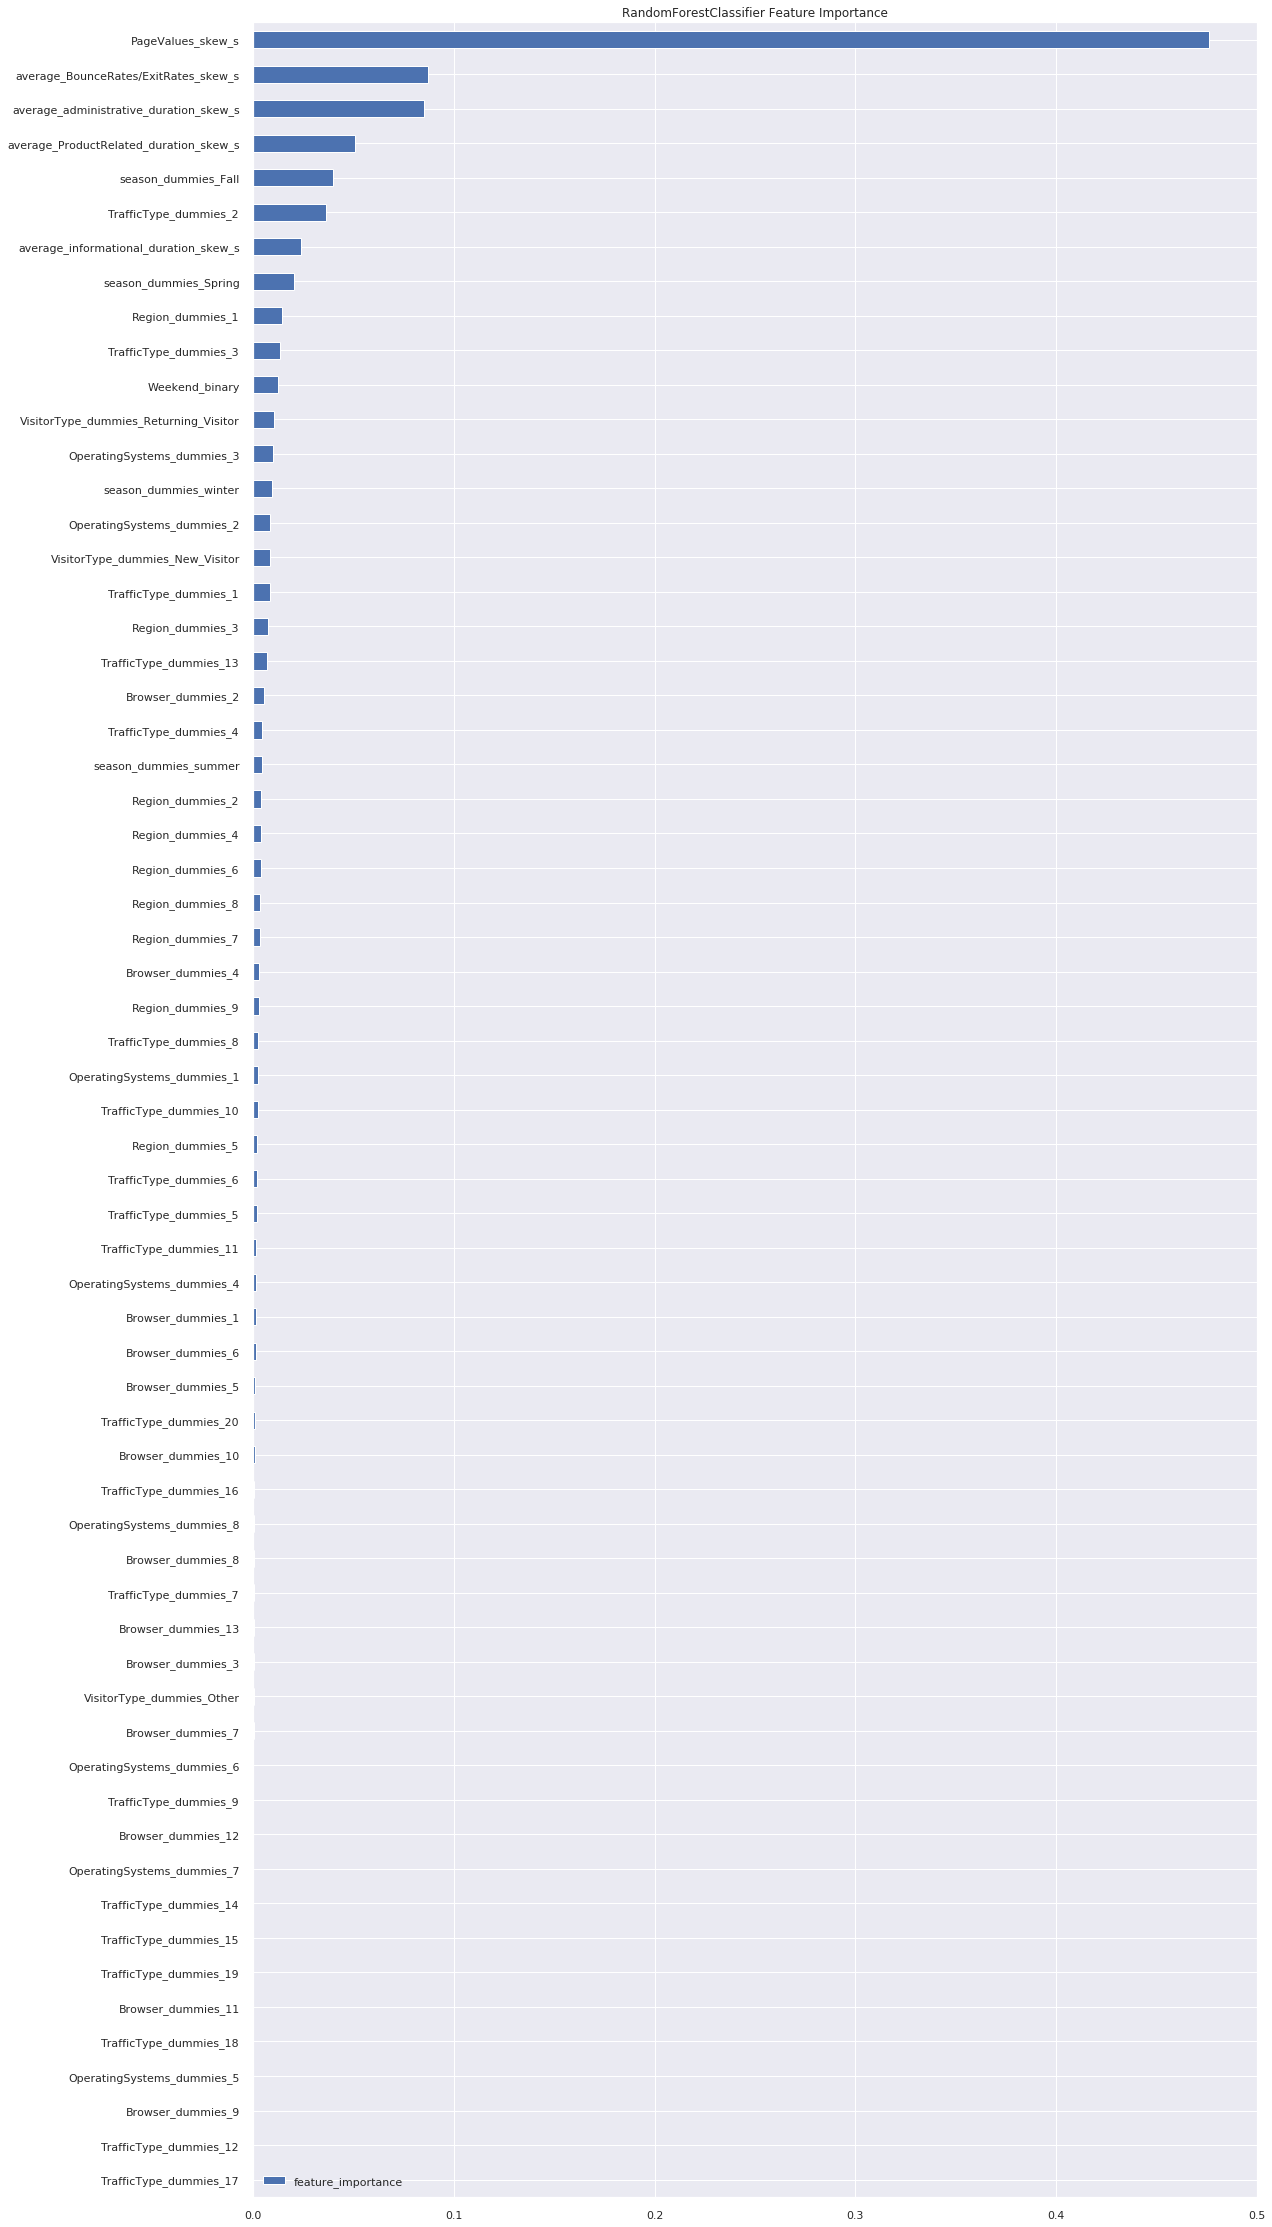

In [5]:
#https://stackoverflow.com/questions/41900387/mapping-column-names-to-random-forest-feature-importances
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(rf_model_Xdata.columns, rf_model.feature_importances_):
    feats[feature] = importance #add the name/value pair 
sns.set()
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'feature_importance'})
importances.sort_values(by='feature_importance').plot(kind='barh', rot=0 , figsize=(18,40) ,title ='RandomForestClassifier Feature Importance')

In [8]:
importances.sort_values(by='feature_importance').tail(10).index

Index(['TrafficType_dummies_3', 'Region_dummies_1', 'season_dummies_Spring', 'average_informational_duration_skew_s', 'TrafficType_dummies_2', 'season_dummies_Fall',
       'average_ProductRelated_duration_skew_s', 'average_administrative_duration_skew_s', 'average_BounceRates/ExitRates_skew_s', 'PageValues_skew_s'],
      dtype='object')

## with Feature selection

In [12]:
rf_model_Xdata = df_X.copy() #making our X columns

best_features_spsa = ['average_informational_duration_skew_s',  'season_dummies_Fall','PageValues_skew_s',
       'average_ProductRelated_duration_skew_s', 'average_administrative_duration_skew_s', 'average_BounceRates/ExitRates_skew_s', 'PageValues_skew_s']
#getting the values of our x features:
Xrf_model = rf_model_Xdata[best_features_spsa].values
#Xrf_model= rf_model_Xdata[cols_2].values
#Xrf_model = rf_model_Xdata.values

#getting the values of our y:
y_rf_model = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(Xrf_model, y_rf_model , test_size=0.25, random_state=123)

from imblearn.over_sampling import SMOTE

sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)


from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=123,n_estimators=500,min_samples_split=40)#,class_weight={0:0.20,1:0.80})

rf_model.fit(X_train_bal,y_train_bal)

rf_train_pred2= rf_model.predict(X_train_bal)

rf_test_pred2 = rf_model.predict(X_test)


print("Training Metrics")
print("Accuracy:",accuracy_score(y_train_bal,rf_train_pred2))
print("Precision:",precision_score(y_train_bal,rf_train_pred2))
print("Recall:",recall_score(y_train_bal,rf_train_pred2))


print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,rf_test_pred2))
print("Precision:",precision_score(y_test,rf_test_pred2))
print("Recall:",recall_score(y_test,rf_test_pred2))


from sklearn.metrics import classification_report
print('Test Classification Report')
print(classification_report(y_test,rf_test_pred2))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_test_pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)

rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(rf_model,X_train_bal, y_train_bal, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(rf_model,X_train_bal, y_train_bal, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())



Training Metrics
Accuracy: 0.9065772669220945
Precision: 0.8965989784477388
Recall: 0.9191570881226053
Test Metrics
Accuracy: 0.8459292896529355
Precision: 0.5103092783505154
Recall: 0.8065173116089613
Test Classification Report
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2592
           1       0.51      0.81      0.63       491

    accuracy                           0.85      3083
   macro avg       0.73      0.83      0.76      3083
weighted avg       0.89      0.85      0.86      3083

Roc -Auc Curve 0.8299561866686782


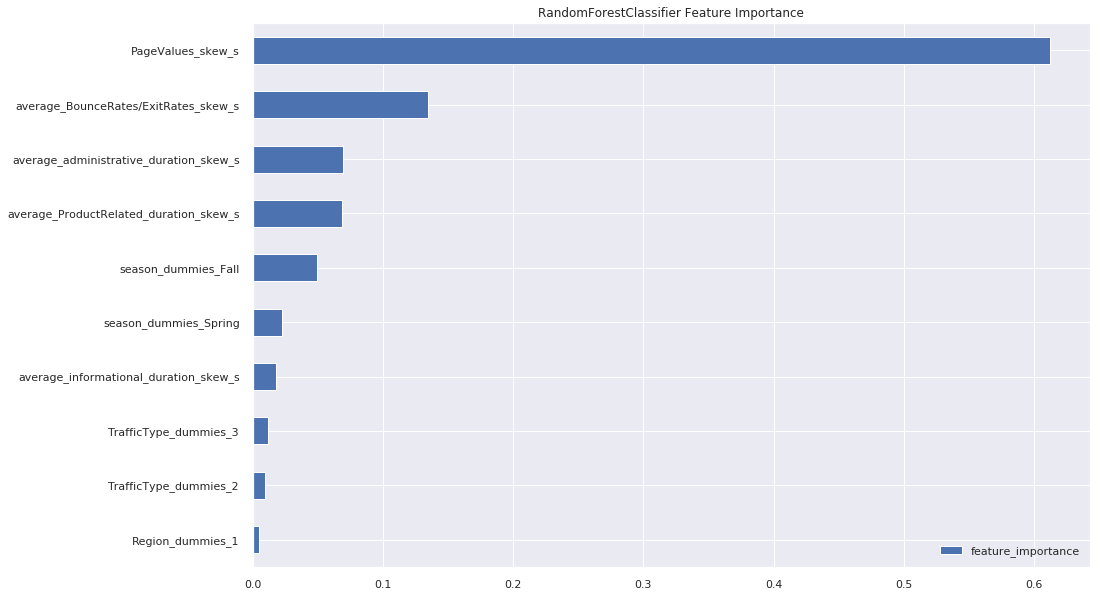

In [10]:
#https://stackoverflow.com/questions/41900387/mapping-column-names-to-random-forest-feature-importances
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(best_features_spsa, rf_model.feature_importances_):
    feats[feature] = importance #add the name/value pair 
sns.set()
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'feature_importance'})
importances.sort_values(by='feature_importance').plot(kind='barh', rot=0 , figsize=(15,10) ,title ='RandomForestClassifier Feature Importance')

In [ ]:
rf_model_Xdata = df_X.copy() #making our X columns

best_features_spsa = ['average_informational_duration_skew_s',  'season_dummies_Fall','PageValues_skew_s',
       'average_ProductRelated_duration_skew_s', 'average_administrative_duration_skew_s', 'average_BounceRates/ExitRates_skew_s', 'PageValues_skew_s']
#getting the values of our x features:
Xrf_model = rf_model_Xdata[best_features_spsa].values
#Xrf_model= rf_model_Xdata[cols_2].values
#Xrf_model = rf_model_Xdata.values

#getting the values of our y:
y_rf_model = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(Xrf_model, y_rf_model , test_size=0.25, random_state=123)

from imblearn.over_sampling import SMOTE

sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)


from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=123,n_estimators=500,min_samples_split=40)#,class_weight={0:0.20,1:0.80})

rf_model.fit(X_train_bal,y_train_bal)

rf_train_pred2= rf_model.predict(X_train_bal)

rf_test_pred2 = rf_model.predict(X_test)


print("Training Metrics")
print("Accuracy:",accuracy_score(y_train_bal,rf_train_pred2))
print("Precision:",precision_score(y_train_bal,rf_train_pred2))
print("Recall:",recall_score(y_train_bal,rf_train_pred2))


print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,rf_test_pred2))
print("Precision:",precision_score(y_test,rf_test_pred2))
print("Recall:",recall_score(y_test,rf_test_pred2))


from sklearn.metrics import classification_report
print('Test Classification Report')
print(classification_report(y_test,rf_test_pred2))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_test_pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)

rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(rf_model,X_train_bal, y_train_bal, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(rf_model,X_train_bal, y_train_bal, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())

